In [82]:
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import fashion_mnist

In [80]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

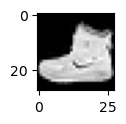

In [85]:
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap="gray")

In [86]:
X_train = X_train / 255
X_test = X_test / 255

# Auto Encoder

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Reshape

- **Build Encoder**

In [93]:
encoder = Sequential()
encoder.add(Flatten())
encoder.add(Dense(128, activation="relu"))

- **Build Decoder**

In [98]:
decoder = Sequential()
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape((28, 28)))

- **Build The AutoEncoder**

In [99]:
from tensorflow.keras.models import Model

In [108]:
class Auto_Encoder(Model):
    def __init__(self):
        super(Auto_Encoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self, inp):
        latent_dim = self.encoder(inp)
        out = self.decoder(latent_dim)
        return out

In [109]:
model = Auto_Encoder()

In [110]:
model.compile(optimizer="adam", 
              loss="mean_squared_error", 
              metrics=["mean_absolute_error"])

In [111]:
model.fit(X_train, X_train, epochs=10, validation_data=[X_test, X_test])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0424 - val_loss: 0.0057 - val_mean_absolute_error: 0.0426
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0422 - val_loss: 0.0057 - val_mean_absolute_error: 0.0431
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0421 - val_loss: 0.0056 - val_mean_absolute_error: 0.0427
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0420 - val_loss: 0.0055 - val_mean_absolute_error: 0.0424
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0419 - val_loss: 0.0056 - val_mean_absolute_error: 0.0424
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0418 - val_loss: 0.0055 - val_mean_absolute_error: 0.0420
Epoc

In [120]:
lat = model.encoder(X_train[0:1])
rec_img = model.decoder(lat).numpy()

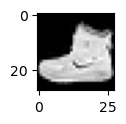

In [117]:
plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap="gray")
plt.show()

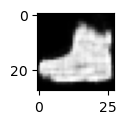

In [122]:
plt.figure(figsize=(1, 1))
plt.imshow(rec_img[0], cmap="gray")
plt.show()

# Search engine using clustering

In [131]:
X_train_comp = model.encoder(X_train).numpy()

In [138]:
from sklearn.cluster import KMeans

In [139]:
clust = KMeans(n_clusters=5)

In [140]:
clust.fit(X_train_comp)

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [141]:
clust.labels_

array([2, 4, 1, ..., 0, 1, 3])

# Demo

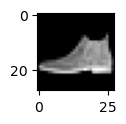

In [144]:
img = X_test[0]
# img = plt.imread("") # read image from computer 
plt.figure(figsize=(1, 1))
plt.imshow(img, cmap="gray")
plt.show()

In [146]:
import numpy as np
img = np.array([img])

(1, 28, 28)

In [151]:
img_comp = model.encoder(img).numpy()

In [159]:
cls = clust.predict(img_comp)[0]
cls

3

In [ ]:
lbls = clust.labels_

In [162]:
reommended_imgs = X_train[lbls==3]

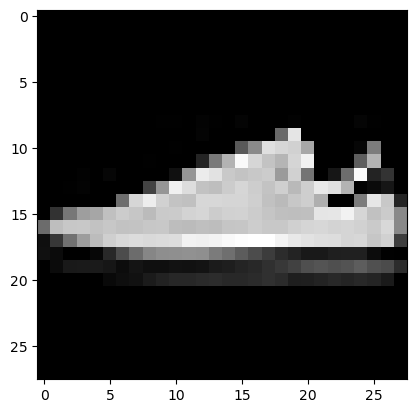

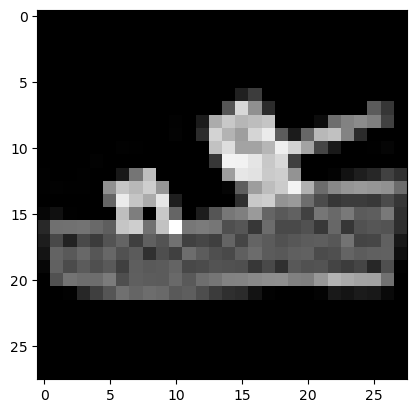

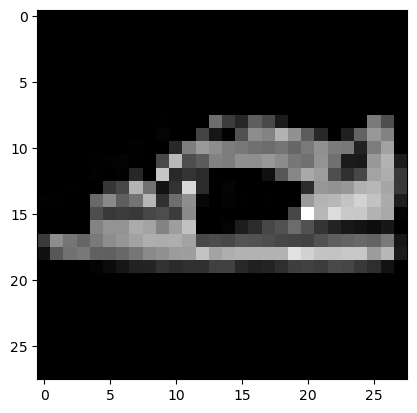

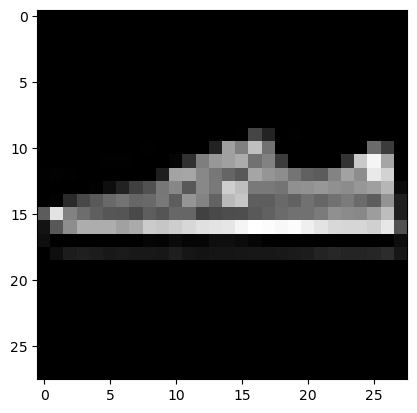

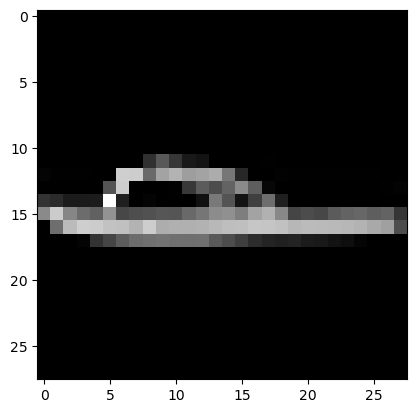

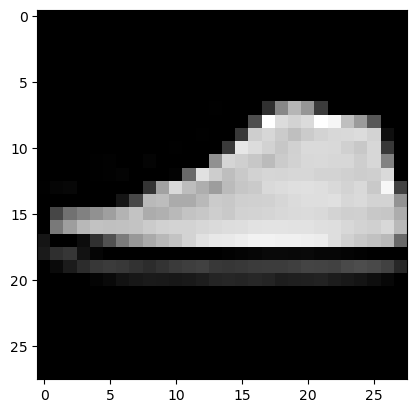

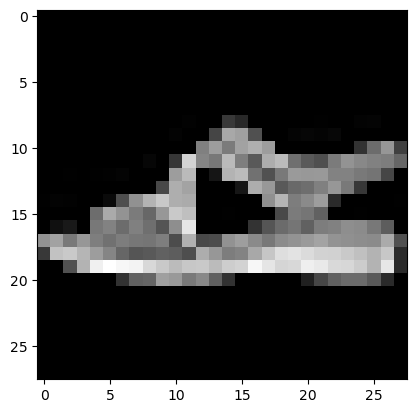

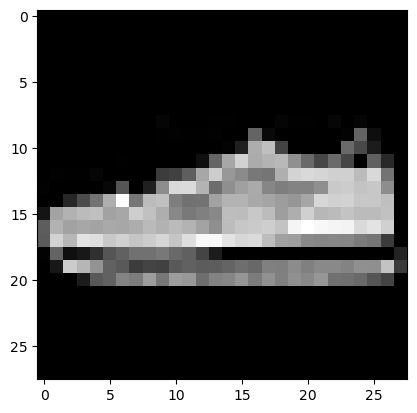

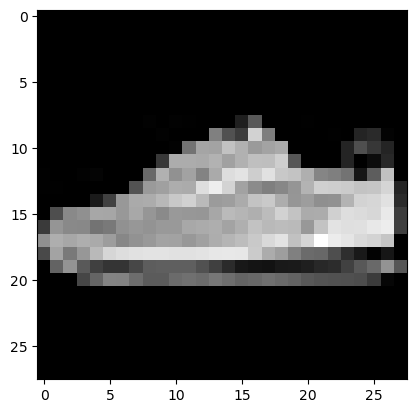

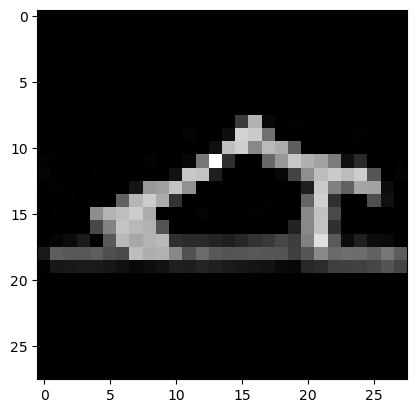

In [165]:
for img in reommended_imgs[:10]:
    plt.figure(figsize=(1, 1))
    plt.imshow(img, cmap="gray")
    plt.show()

In [164]:
X_train.shape

(60000, 28, 28)